In [1]:
print("Multimedia Security Experiment 7")

Multimedia Security Experiment 7


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import myipf # 前面的实验编写的函数
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

# 1. 图像插值
采用原图的与缩放后的图几何中心进行缩放，缩小或放大图像能够取到原图的绝大部分像素值，同时索引不会溢出。
每种插值选用0.5和0.25倍缩放查看效果，并对0.5倍缩放图像后再扩大2倍，再与图像进行比较，PSNR均大于32，可以看到双线性插值法相似度稍微高一些。
最后使用OpenCV计算机视觉库中的resize()函数进行了0.5缩放和扩大2倍，PSNR比自己写的两中插值方法相差不大。

我使用最近邻点法先2x再0.5x就会得到原图，因为这种方式扩大图像并没有丢弃原图的信息，但是缩小图像会有像素值丢失。

双线性插值得到的2倍缩放亮度偏高，我想是因为双线性目标点的像素由原图的四个点决定，像素值会扩散，导致输出图像变亮。

In [8]:
img = plt.imread("standard_test_images/lena_gray_256.tif");

In [20]:
half_img = zoomByInterpolation(img, xratio=0.5, yratio=0.5, method="neighbor");
quarter_img = zoomByInterpolation(img, xratio=0.25, yratio=0.25, method="neighbor");

## 最近邻点法

均方差： 31.9495849609375
峰值信噪比： 33.08615140011844


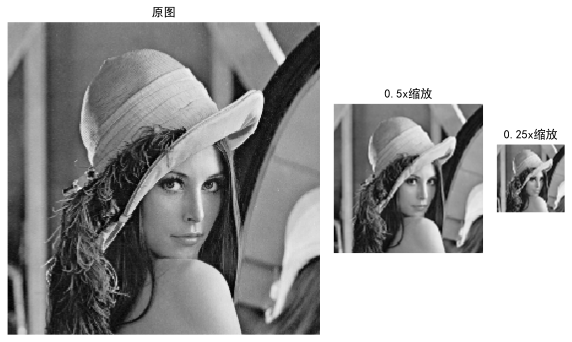

In [29]:
fig = plt.figure(figsize=(10, 10))
#fig.suptitle('实验7')
gs = GridSpec(1, 7)
ax1 = fig.add_subplot(gs[0:, 0:4])
ax2 = fig.add_subplot(gs[0:, 4:6])
ax3 = fig.add_subplot(gs[0:, 6:7])
ax1.imshow(img, cmap="gray"), ax1.axis("off"), ax1.set_title("原图")
ax2.imshow(half_img, cmap="gray"), ax2.axis("off"), ax2.set_title("0.5x缩放")
ax3.imshow(quarter_img, cmap="gray"), ax3.axis("off"), ax3.set_title("0.25x缩放")
myipf.calcMSEPSNR(img, zoomByInterpolation(half_img, xratio=2, yratio=2, method="neighbor"))

## 双线性插值法

In [22]:
half_img = zoomByInterpolation(img, xratio=0.5, yratio=0.5, method="bilinear");
quarter_img = zoomByInterpolation(img, xratio=0.25, yratio=0.25, method="bilinear");

In [23]:
ax1.imshow(img, cmap="gray"), ax1.axis("off"), ax1.set_title("原图")
ax2.imshow(half_img, cmap="gray"), ax2.axis("off"), ax2.set_title("0.5x缩放")
ax3.imshow(quarter_img, cmap="gray"), ax3.axis("off"), ax3.set_title("0.25x缩放")
fig.show()
myipf.calcMSEPSNR(img, zoomByInterpolation(half_img, xratio=2, yratio=2, method="bilinear"))

均方差： 33.476165771484375
峰值信噪比： 32.88344651082079


## 2x缩放比较

In [24]:
double_img1 = zoomByInterpolation(img, xratio=2, yratio=2, method="neighbor");
double_img2 = zoomByInterpolation(img, xratio=2, yratio=2, method="bilinear");
double_img3 = zoomByInterpolation(img, xratio=2, yratio=0.5, method="bilinear");

均方差： 0.0
峰值信噪比： inf


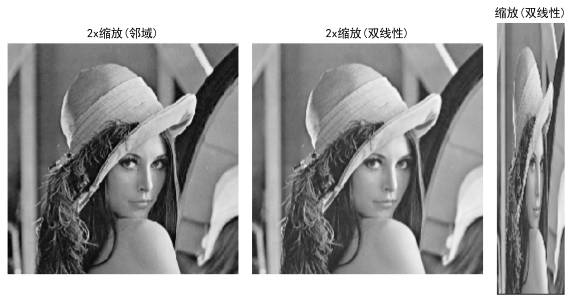

In [28]:
fig2 = plt.figure(figsize=(10, 10))
ax1 = fig2.add_subplot(gs[0:, 0:3])
ax2 = fig2.add_subplot(gs[0:, 3:6])
ax3 = fig2.add_subplot(gs[0:, 6:7])
ax1.imshow(double_img1, cmap="gray"), ax1.axis("off"), ax1.set_title("2x缩放(邻域)")
ax2.imshow(double_img2, cmap="gray"), ax2.axis("off"), ax2.set_title("2x缩放(双线性)")
ax3.imshow(double_img3, cmap="gray"), ax3.axis("off"), ax3.set_title("缩放(双线性)")
fig2.show()
myipf.calcMSEPSNR(img, zoomByInterpolation(double_img1, xratio=0.5, yratio=0.5, method="neighbor"))

> opencv测试

In [14]:
import cv2 as cv

In [15]:
half_img = cv.resize(img, (128, 128))
temp_img = cv.resize(half_img, (256, 256))
myipf.calcMSEPSNR(img, temp_img)

均方差： 31.636672973632812
峰值信噪比： 33.128895556113505
